# Comparing Significant Features for Different Cities

## Summary
<br> The list of significant features for predicting the Airbnb price of a listing was analysed and exported in a txt file for each city.
<br> Here, the lists are loaded and compared to specify a general guidline for important listing features

<br> loading necessary libraries

In [1]:
# import os
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<br> list of cities

In [2]:
city_names = ['Montreal', 'New_Brunswick', 'Quebec_City', 'Toronto', 'Vancouver', 'Victoria']

<br> loading features and creating a data frame to compare the cities

In [3]:
def load_features(city):
    # opening the file in read mode
    feat_file = open(f'{city}_feat.txt', 'r')
    # reading the file
    features = feat_file.read()
    # splitting the text
    feature_list = features.split("\n")
    feat_file.close()
    return feature_list[0:-1]

def all_elements(list1, list2):
    return sorted(list(set(list1 + list2)))

all_features = load_features(city_names[0])
for city in city_names[1:]:
    all_features = all_elements(load_features(city), all_features)

df_feat=pd.DataFrame(index=all_features)
for city in city_names:
    df_feat[city] = pd.DataFrame(data=True, index=load_features(city), columns=[city])


# defining a new column: sum
# shows the total number of times a feature is statistically significant amoung cities
df_feat['sum'] = df_feat.sum(axis=1, skipna=True)
df_feat.sort_values(by='sum', ascending=False, inplace=True)

df_feat.style.highlight_between(subset=['sum'], left=4, right=6, color='green')\
                    .highlight_between(subset=['sum'], left=0, right=3, color='red')\
                    .highlight_between(subset=city_names, left=False, right=True, color='lightgreen')\
                    .highlight_null(null_color='pink')

,Montreal,New_Brunswick,Quebec_City,Toronto,Vancouver,Victoria,sum
accommodates,True,True,True,True,True,True,6.000000
bath_is_shared,True,True,True,True,True,True,6.000000
bathroom_numbers,True,True,True,True,True,True,6.000000
availability_30,True,True,nan,True,True,True,5.000000
bedrooms,True,nan,True,True,True,True,5.000000
room_type_pca,True,True,nan,True,True,True,5.000000
minimum_nights,nan,nan,True,True,True,True,4.000000
number_of_reviews,nan,True,True,True,nan,True,4.000000
number_of_reviews_ltm,True,True,True,True,nan,nan,4.000000
review_pca,True,nan,nan,True,True,True,4.000000


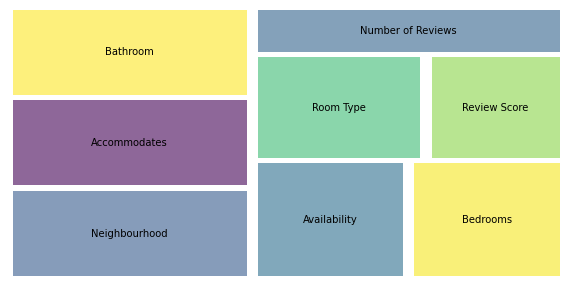

In [16]:
import squarify

plt.figure(figsize=(10,5))
sizes=[6,6,6,5,5,5,4,4]
label=['Neighbourhood','Accommodates','Bathroom','Availability','Bedrooms','Room Type','Review Score','Number of Reviews']
squarify.plot(sizes=sizes, label=label, alpha=0.6, pad=True)
plt.axis('off');